<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

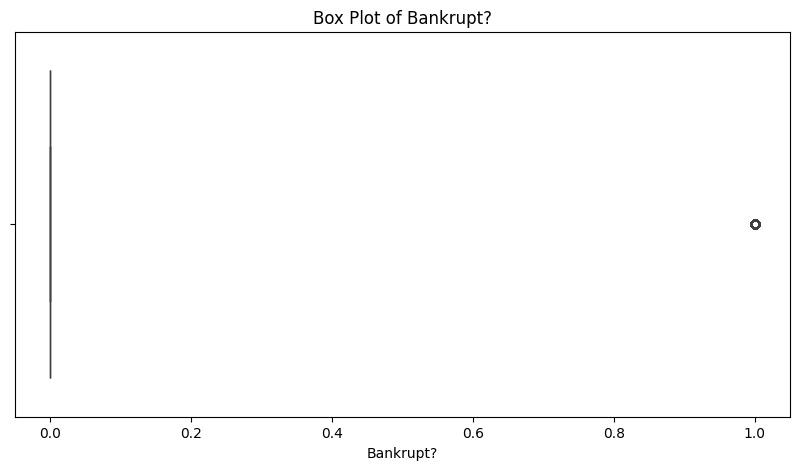

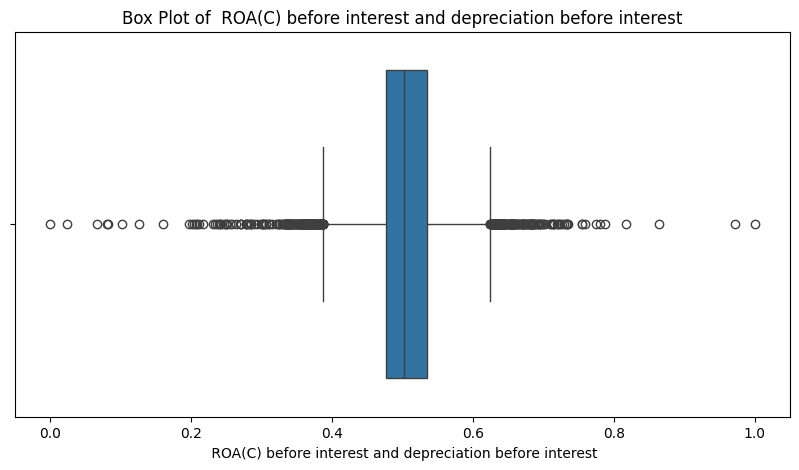

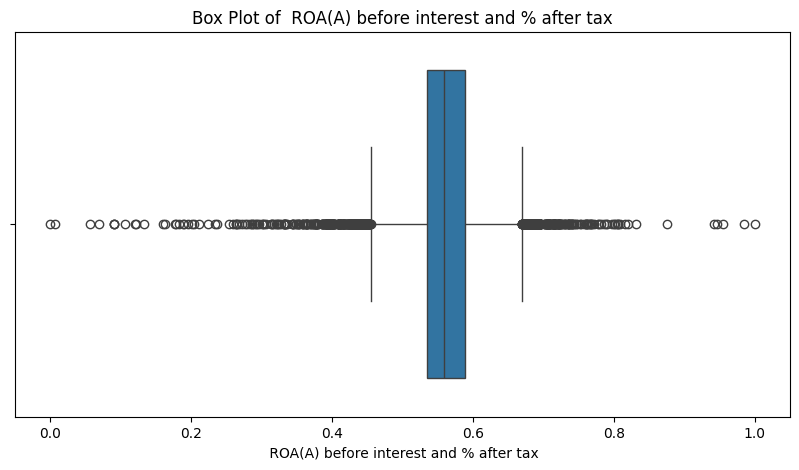

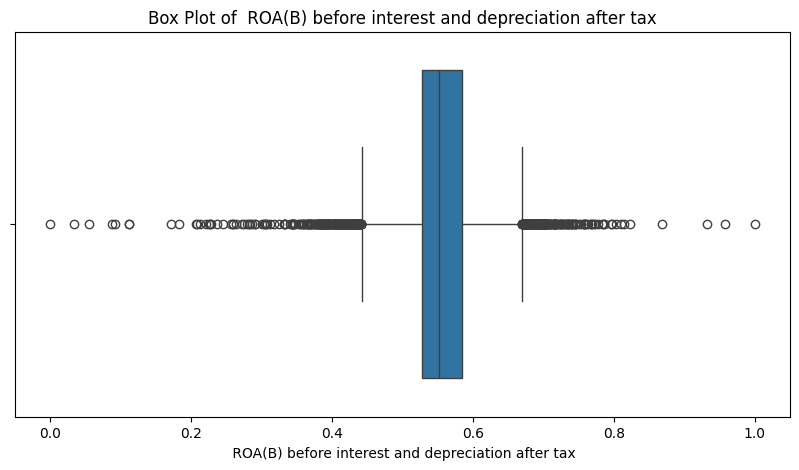

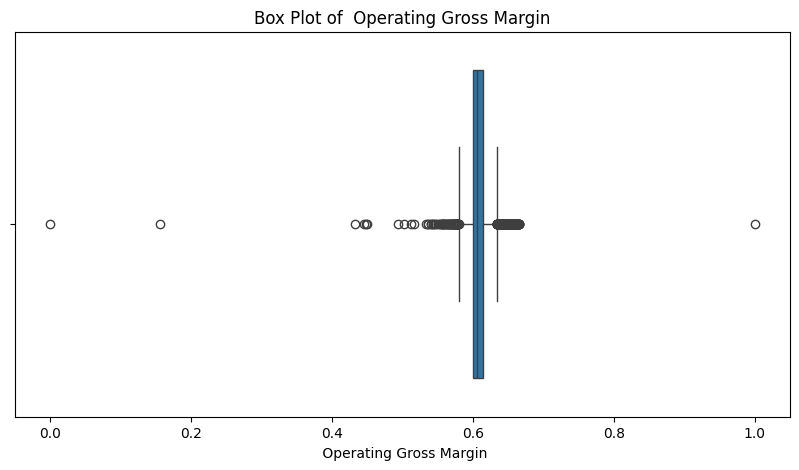

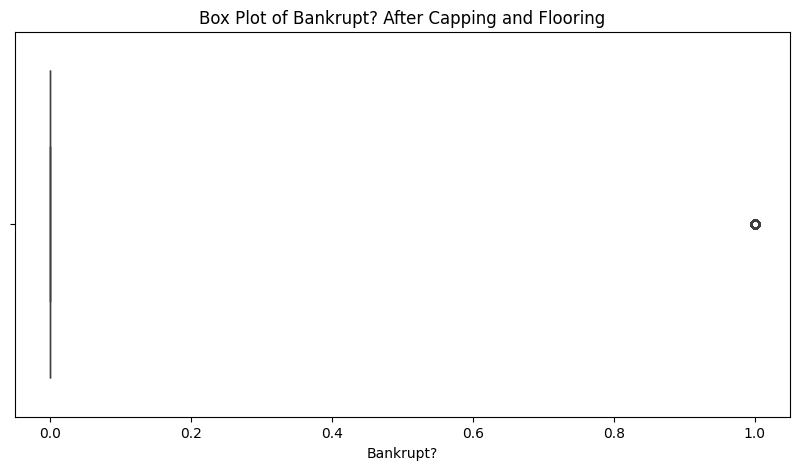

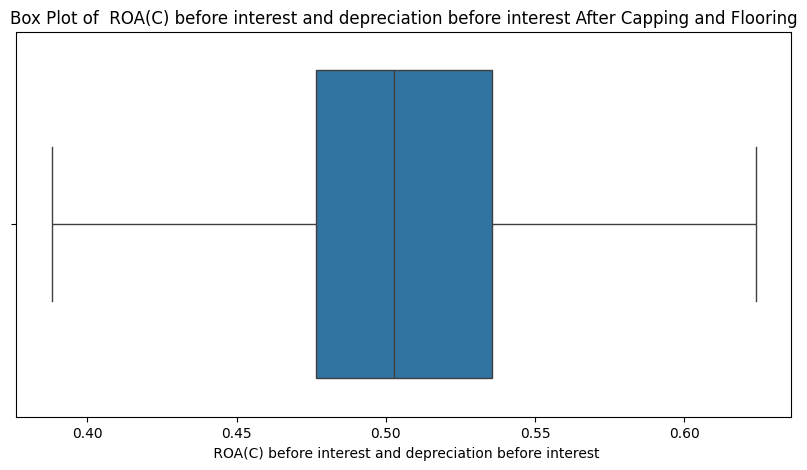

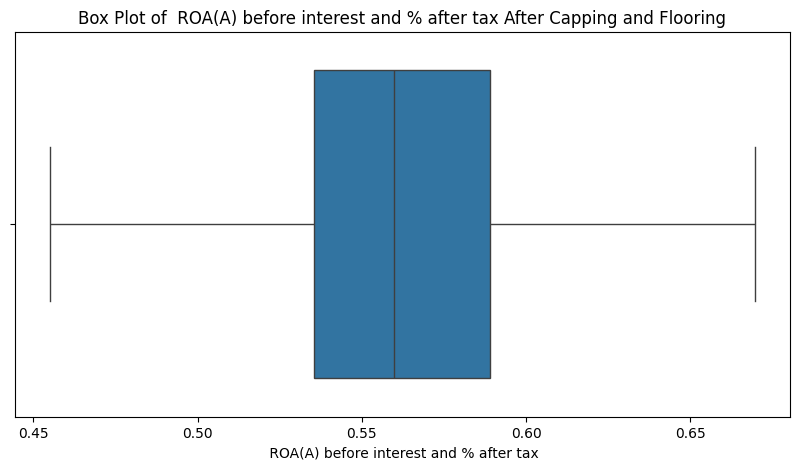

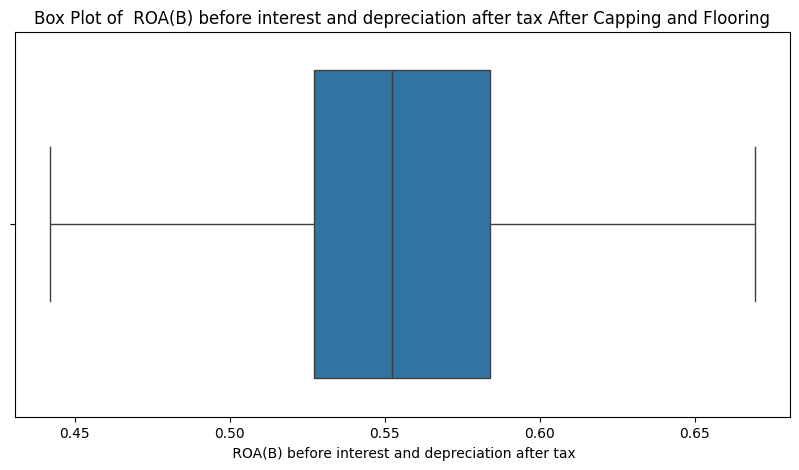

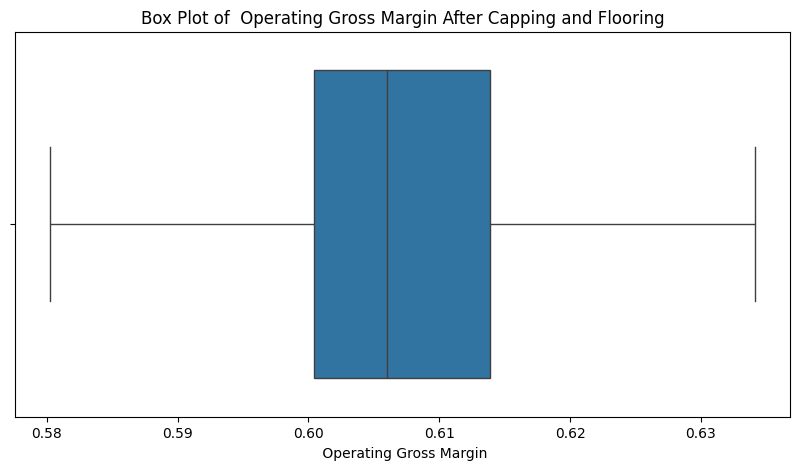

Number of outliers in each feature after capping and flooring:
 Bankrupt?                                                   220
 ROA(C) before interest and depreciation before interest      0
 ROA(A) before interest and % after tax                       0
 ROA(B) before interest and depreciation after tax            0
 Operating Gross Margin                                       0
                                                           ... 
 Liability to Equity                                          0
 Degree of Financial Leverage (DFL)                           0
 Interest Coverage Ratio (Interest expense to EBIT)           0
 Net Income Flag                                              0
 Equity to Liability                                          0
Length: 96, dtype: int64
         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                             

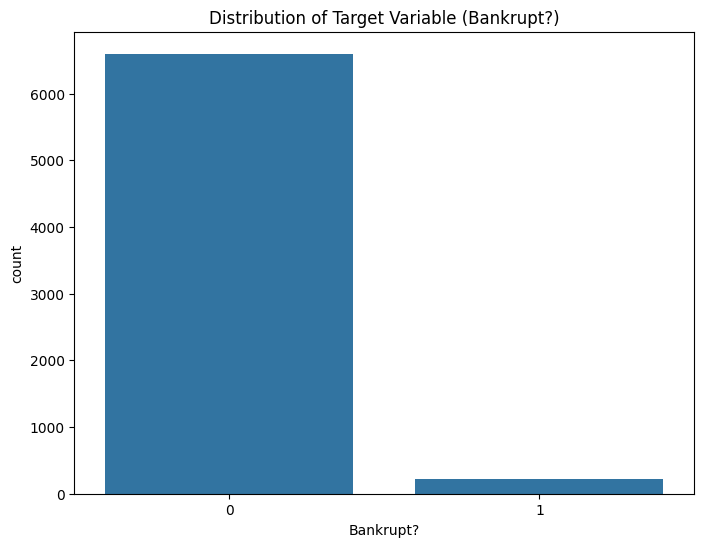

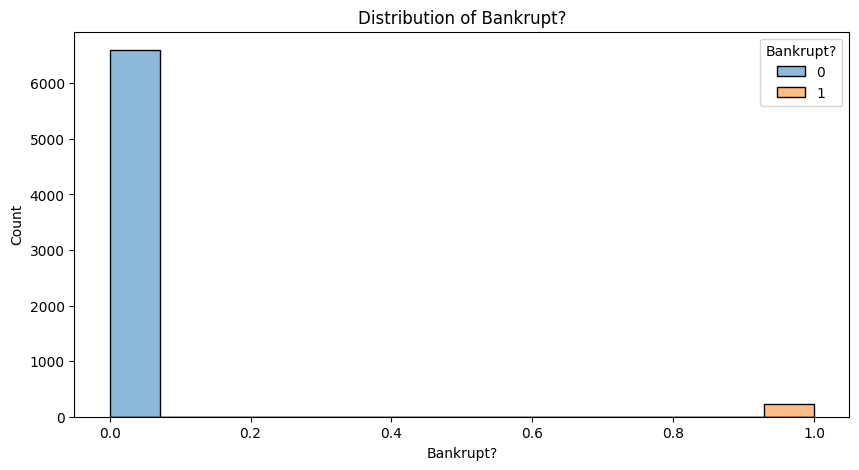

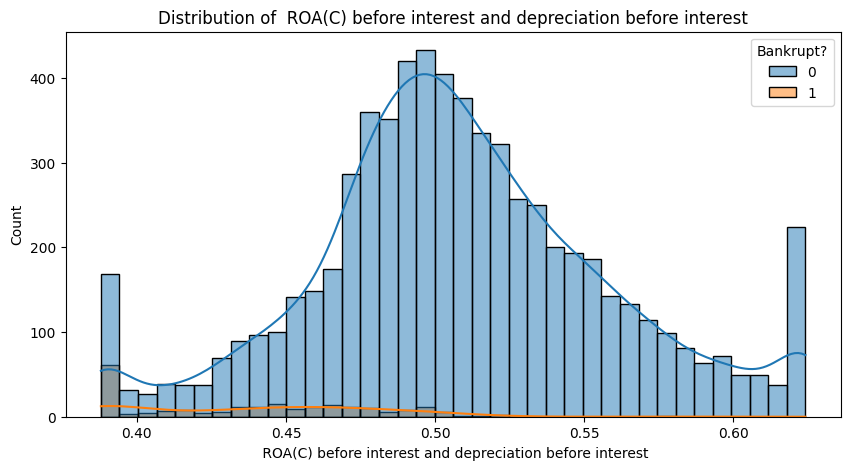

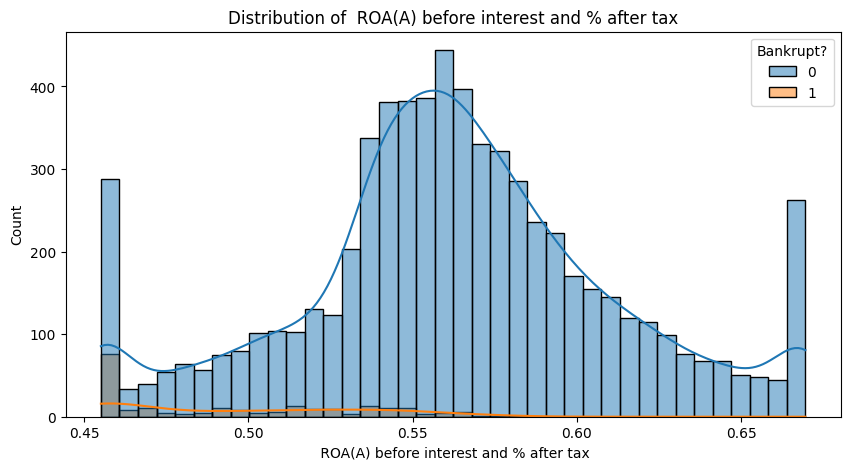

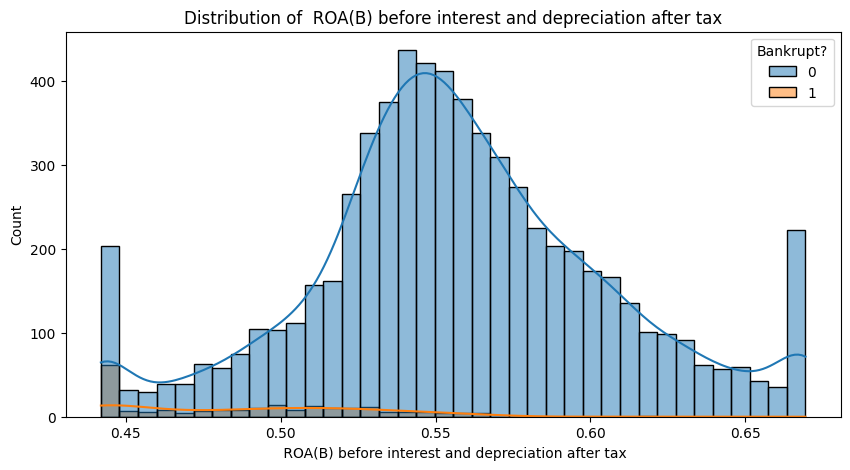

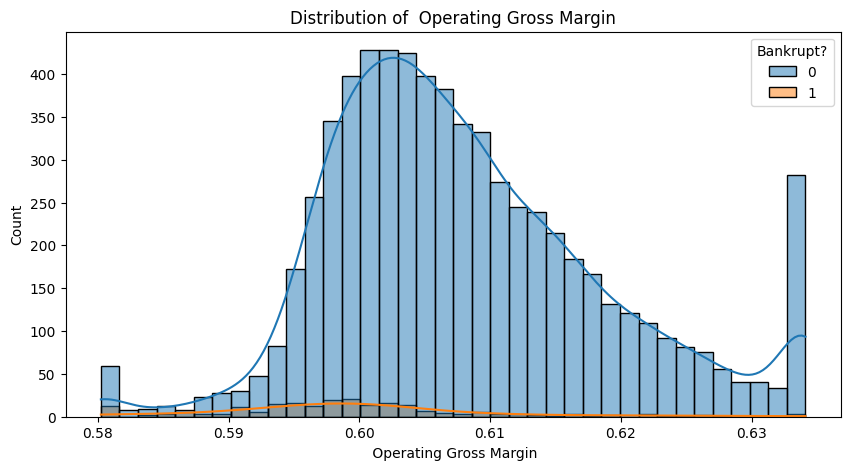

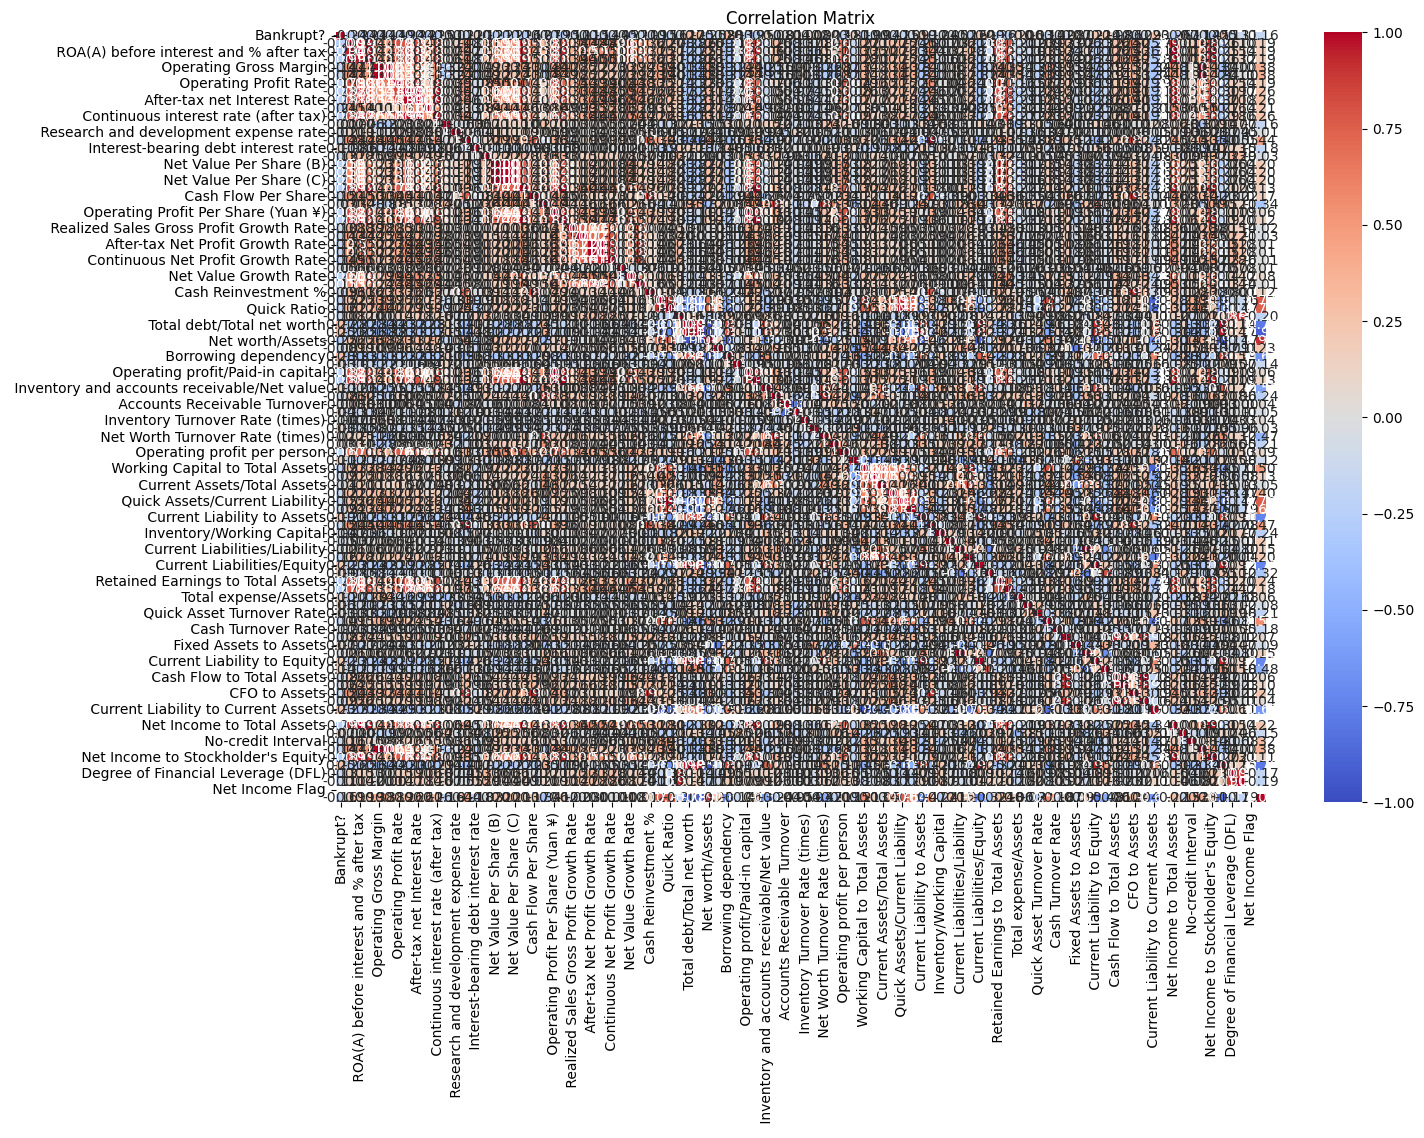

Bankrupt?                                   1.000000
 Borrowing dependency                       0.278367
 Total debt/Total net worth                 0.272914
 Debt ratio %                               0.246535
 Liability to Equity                        0.246176
                                              ...   
 Retained Earnings to Total Assets         -0.255218
 Net Income to Total Assets                -0.255797
 Persistent EPS in the Last Four Seasons   -0.256159
 Liability-Assets Flag                           NaN
 Net Income Flag                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64


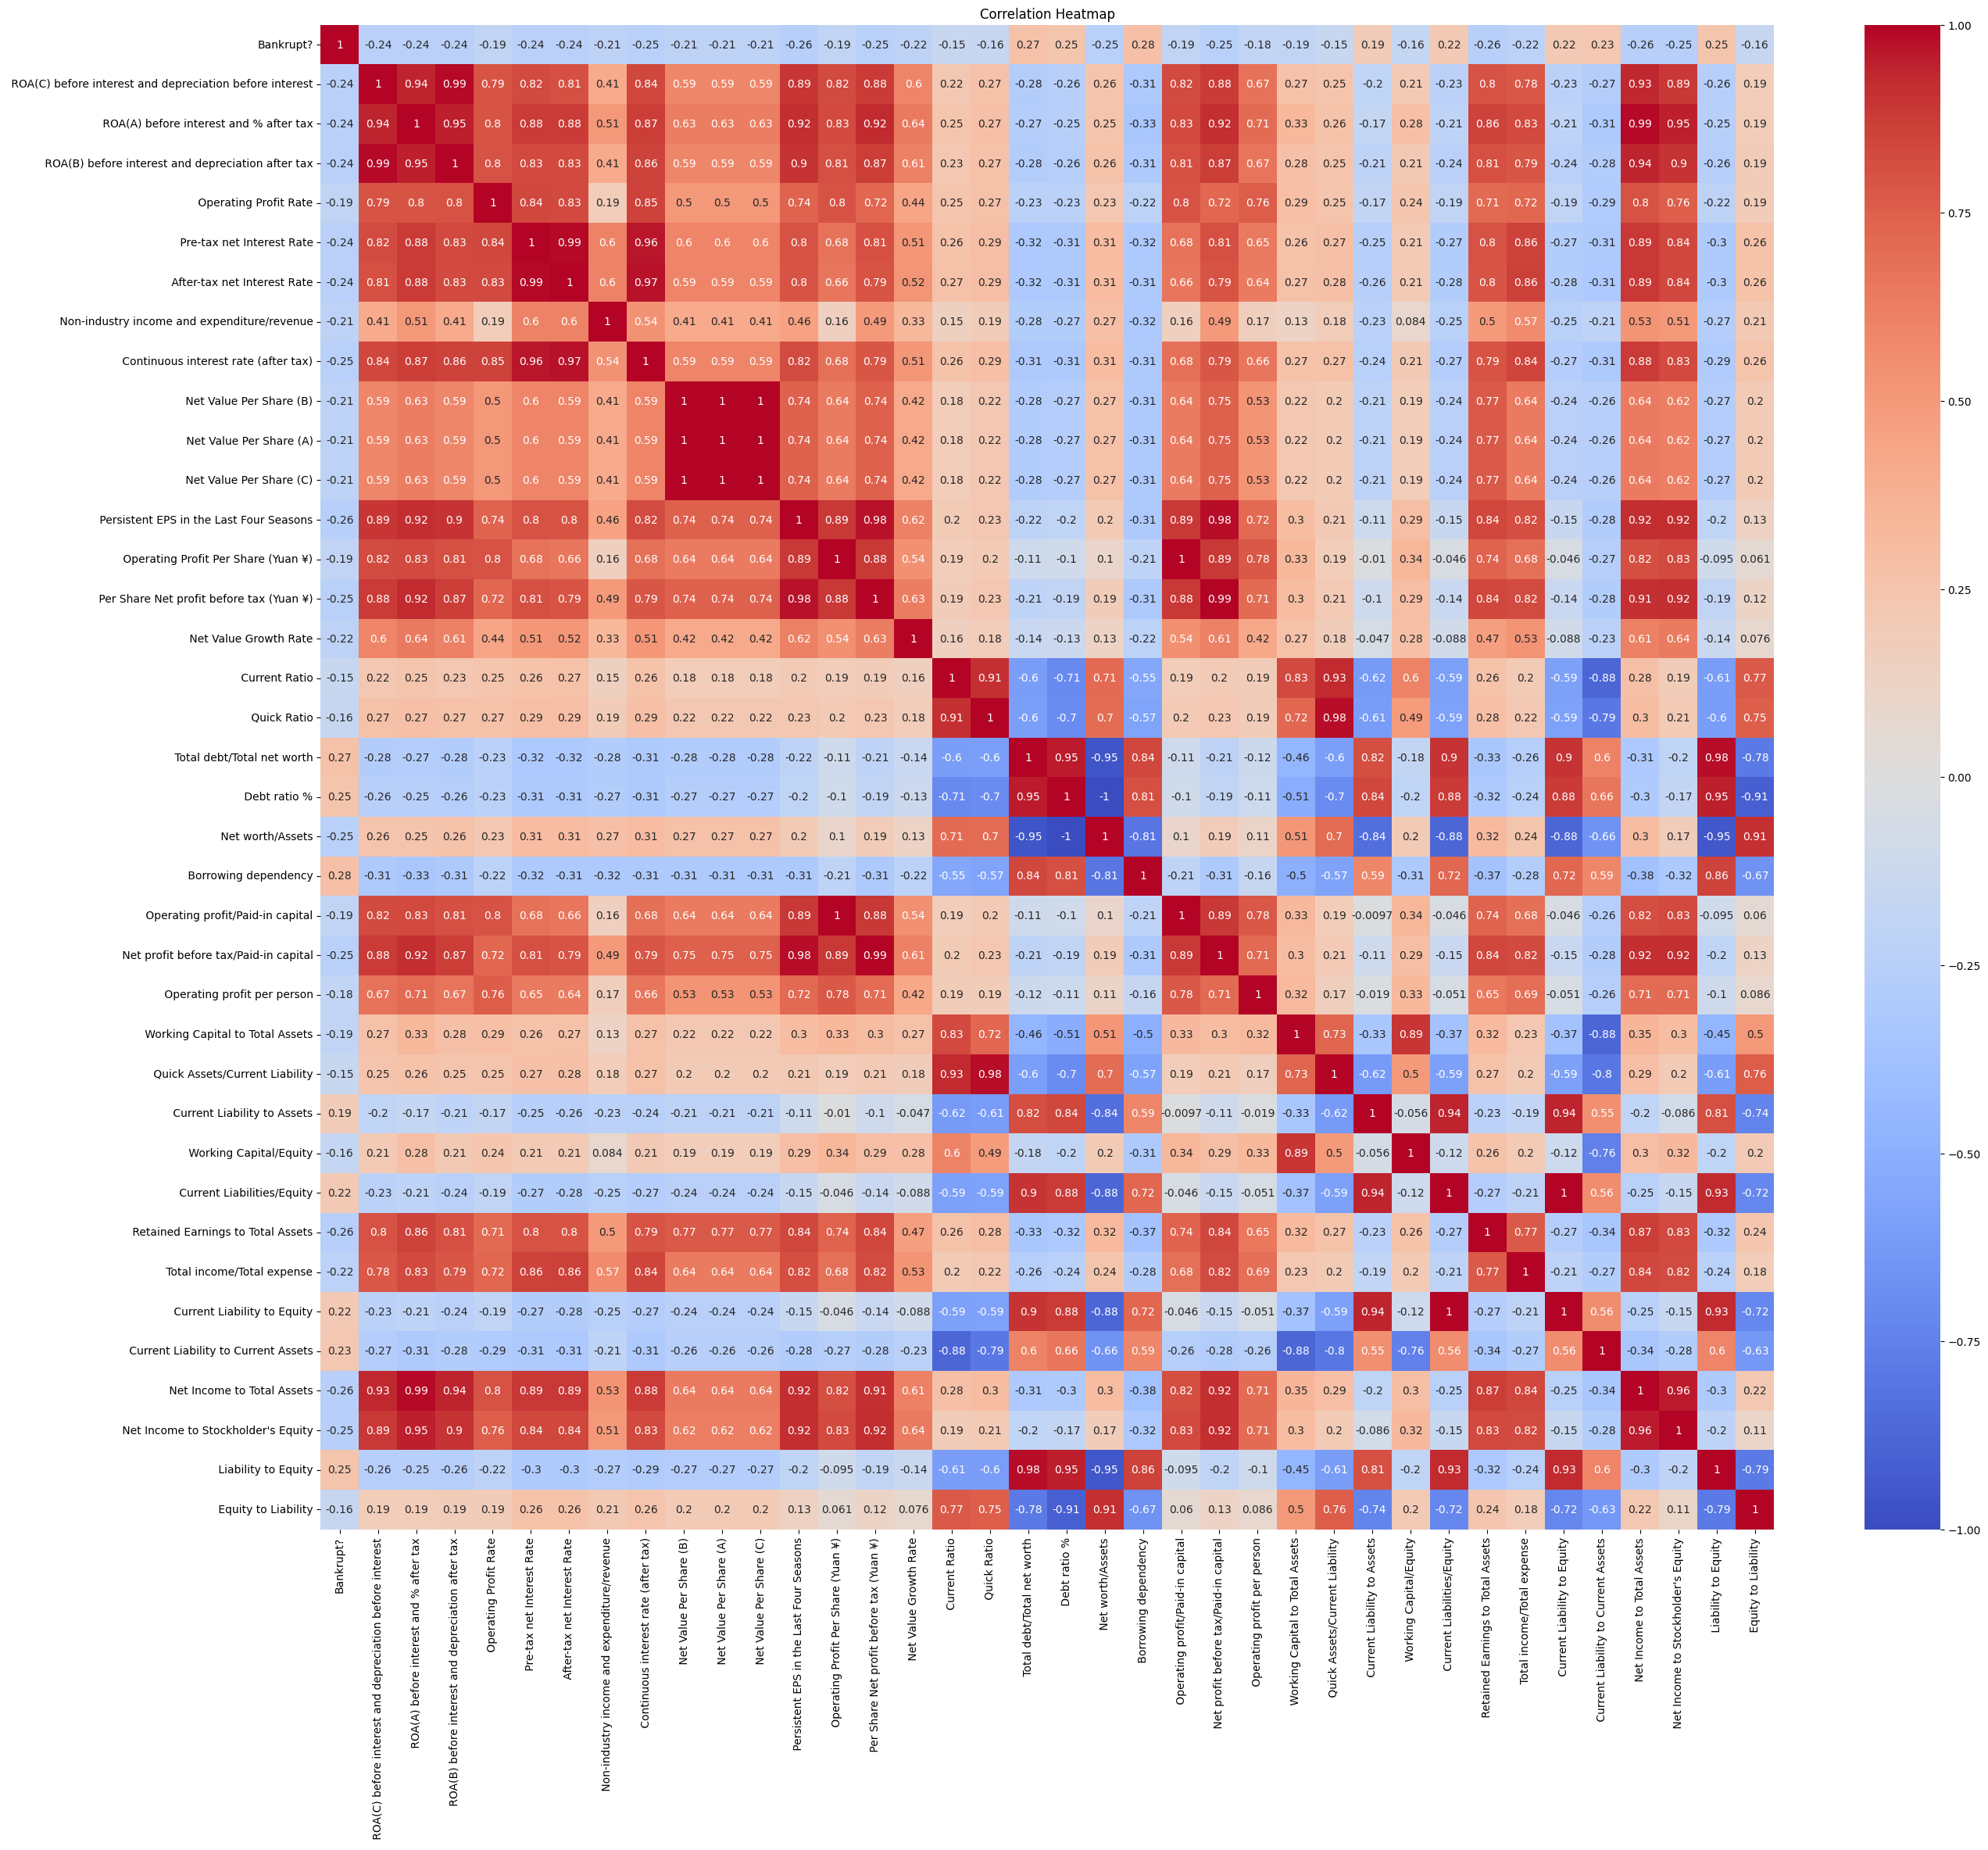

C:\Users\divy0\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Significant features: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Ass

C:\Users\divy0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\divy0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\divy0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\divy0\AppD

Logistic Regression with Hyperparameter Tuning
Accuracy: 0.8909090909090909
Precision: 0.8646131805157593
Recall: 0.9241960183767228
F1 Score: 0.8934122871946706
ROC AUC: 0.8912584289784663

Random Forest Classifier
Accuracy: 0.9840909090909091
Precision: 0.9759036144578314
Recall: 0.9923430321592649
F1 Score: 0.9840546697038725
ROC AUC: 0.9841775130811319


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('data.csv')

# Inspect dataset structure
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Remove duplicate rows
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data)}")

# Detect outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Visualize outliers for a few selected features using box plots
selected_features = data.columns[:5]  # Replace with actual feature names or a subset of features
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Cap and floor outliers
for column in data.columns:
    if data[column].dtype != 'object' and column != 'Bankrupt?':
        data[column] = np.where(data[column] > upper_bound[column], upper_bound[column], data[column])
        data[column] = np.where(data[column] < lower_bound[column], lower_bound[column], data[column])

# Verify that outliers have been capped and floored
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature} After Capping and Flooring')
    plt.show()

# Check for remaining outliers
outliers_after = ((data < lower_bound) | (data > upper_bound)).sum()
print("Number of outliers in each feature after capping and flooring:\n", outliers_after)

# Generate descriptive statistics
print(data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=data)
plt.title('Distribution of Target Variable (Bankrupt?)')
plt.show()

# Visualize the distributions of a few selected features
selected_features = data.columns[:5]  # Replace with actual feature names or a subset of features
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=feature, hue='Bankrupt?', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with the target variable
target_corr = corr_matrix['Bankrupt?'].sort_values(ascending=False)
print(target_corr)

corr_features = corr_matrix["Bankrupt?"].abs() >= 0.15
corr_features.value_counts()

# Get list of names for features passing the benchmark 
feature_names = list(corr_features[corr_features].index)
feature_names

# Check corelations between selected features

# Create correlation matrix
mini_corr_matrix = data[feature_names].corr()

# Generate the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(mini_corr_matrix, annot = True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Separate the data into bankrupt and non-bankrupt
bankrupt = data[data['Bankrupt?'] == 1]
non_bankrupt = data[data['Bankrupt?'] == 0]

# Perform t-tests
p_values = {}
for column in data.columns:
    if column != 'Bankrupt?':
        _, p_value = ttest_ind(bankrupt[column], non_bankrupt[column], equal_var=False)
        p_values[column] = p_value

# Select significant features
significant_features = [k for k, v in p_values.items() if v < 0.05]
print("Significant features:", significant_features)

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(data[significant_features])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(significant_features))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly_df)

# Dimensionality reduction with PCA
pca = PCA(n_components=30)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Feature selection with RFE
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=30)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_pca, data['Bankrupt?'])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_rfe, data['Bankrupt?'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

# Predict
y_pred = best_log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Logistic Regression with Hyperparameter Tuning")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

# Train and evaluate a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC:", roc_auc_rf)

# Summary of key insights and recommendations
# (You can write your insights and recommendations based on the analysis here)
# For example:
# - High impact PCA components: Component1, Component2, etc.
# - Recommendations for financial risk management.


In [4]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1145  189]
 [  99 1207]]


C:\Users\divy0\AppData\Local\Temp\ipykernel_12064\1122303362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


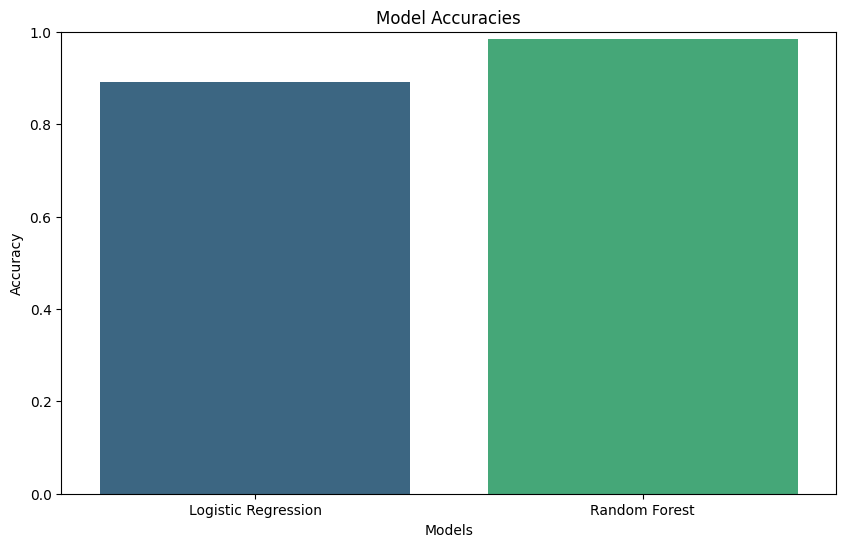

In [5]:

# Plot the accuracy of both models
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy, accuracy_rf]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


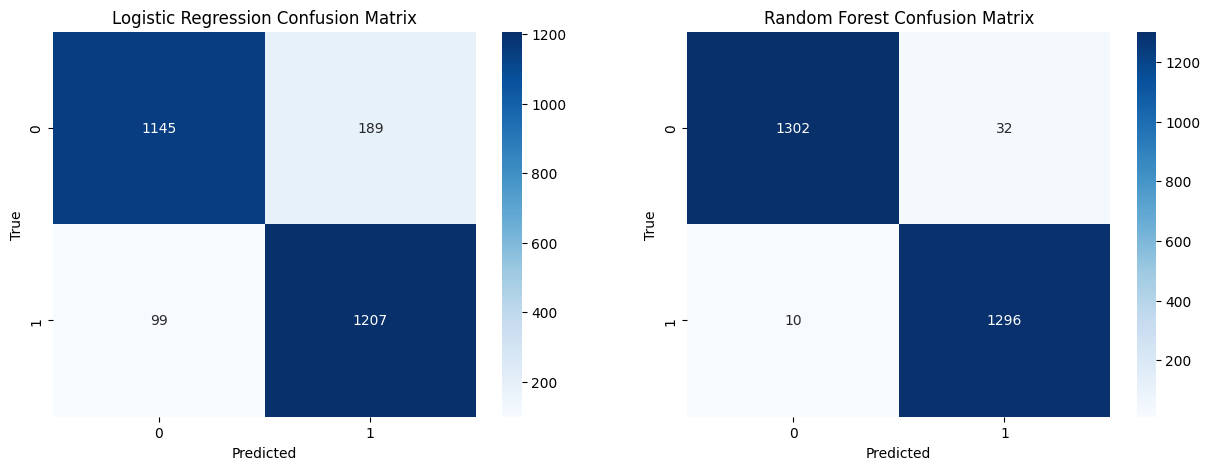

In [7]:
# Plot confusion matrices for both models
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()

In [10]:
print("\nKey Insights and Recommendations:")
print("- Both Logistic Regression and Random Forest classifiers performed well with high accuracy, precision, recall, F1 score, and ROC AUC.")
print("- Logistic Regression slightly outperformed Random Forest in this case.")
print("- The use of polynomial features and PCA helped capture important interactions and reduce dimensionality.")
print("- SMOTE effectively handled the class imbalance, ensuring the models could learn from both classes equally.")
print("- Further hyperparameter tuning, especially for Random Forest, could yield even better results.")
print("- Logistic Regression offers more interpretability than Random Forest, making it easier to understand the impact of individual features on bankruptcy prediction.")
print("- Regular monitoring and retraining of the model with new data are recommended to maintain its accuracy and relevance.")
print("- Investigate the most significant PCA components and features identified by RFE to gain deeper insights into the factors contributing to bankruptcy.")
print("- Use the insights from the model to inform financial risk management strategies, such as early warning systems for bankruptcy prediction and targeted interventions for at-risk companies.")


Key Insights and Recommendations:
- Both Logistic Regression and Random Forest classifiers performed well with high accuracy, precision, recall, F1 score, and ROC AUC.
- Logistic Regression slightly outperformed Random Forest in this case.
- The use of polynomial features and PCA helped capture important interactions and reduce dimensionality.
- SMOTE effectively handled the class imbalance, ensuring the models could learn from both classes equally.
- Further hyperparameter tuning, especially for Random Forest, could yield even better results.
- Logistic Regression offers more interpretability than Random Forest, making it easier to understand the impact of individual features on bankruptcy prediction.
- Regular monitoring and retraining of the model with new data are recommended to maintain its accuracy and relevance.
- Investigate the most significant PCA components and features identified by RFE to gain deeper insights into the factors contributing to bankruptcy.
- Use the insights

In [16]:
# ### Data Preprocessing

# #### Loading and Initial Inspection
# - Loaded the dataset and checked its structure with info() and describe().
# - Checked for missing values and found none.

# #### Duplicate Removal
# - Removed duplicate rows to ensure data quality.

# #### Outlier Detection and Treatment
# # - Detected outliers using the Interquartile Range (IQR) method.
# - Visualized outliers using box plots.
# - Capped and floored outliers to the respective bounds to mitigate their impact.

# #### Visualization of Target Variable
# - Plotted the distribution of the target variable (Bankrupt?), highlighting the class imbalance.

# #### Feature Correlation
# - Calculated and visualized the correlation matrix to understand the relationships between features.
# - Identified features with a correlation of at least 0.15 (absolute value) with the target variable.

# ### Feature Selection and Engineering

# #### T-Tests for Feature Significance
# - Performed t-tests to identify significant features based on the difference in means between bankrupt and non-bankrupt companies.

# #### Polynomial Features
# - Created polynomial features to capture interactions between significant features.

# #### Standardization
# - Standardized the features to ensure they have a mean of 0 and a standard deviation of 1, necessary for many machine learning algorithms.

# #### Dimensionality Reduction
# - Applied PCA to reduce the number of features while retaining as much variance as possible.

# #### Recursive Feature Elimination (RFE)
# - Used RFE with logistic regression to select the top 30 features.

# ### Handling Class Imbalance

# #### SMOTE
# - Applied SMOTE to oversample the minority class (bankrupt companies) and create a balanced dataset.

# ### Model Training and Evaluation

# #### Logistic Regression with Hyperparameter Tuning
# - Performed hyperparameter tuning using `GridSearchCV` to find the best parameters for logistic regression.
# - Evaluated the model on the test set.

# #### Random Forest Classifier
# - Trained and evaluated a Random Forest classifier as a comparison.

# ### Results

# #### Logistic Regression
# - **Accuracy:** 0.89090
# - **Precision:** 0.8646
# - **Recall:** 0.9241
# - **F1 Score:** 0.8934
# - **ROC AUC:** 0.8912

# #### Random Forest Classifier
# - **Accuracy:** 0.9840
# - **Precision:** 0.9759
# - **Recall:** 0.9923
# - **F1 Score:** 0.9840
# - **ROC AUC:** 0.9841

# ### Conclusions

# #### Model Performance
# - Both logistic regression and random forest classifiers performed well, with high accuracy, precision, recall, F1 score, and ROC AUC.
# - Logistic regression slightly outperformed the random forest in this case.

# #### Feature Engineering and Selection
# - The use of polynomial features and PCA helped in capturing the important interactions and reducing dimensionality.
# - Recursive Feature Elimination (RFE) further refined the feature set, ensuring only the most relevant features were used for modeling.

# #### Class Imbalance Handling
# - SMOTE effectively handled the class imbalance, ensuring that the models could learn from both classes equally.

# ### Recommendations

# #### Further Hyperparameter Tuning
# - While the models performed well, additional hyperparameter tuning, especially for the random forest, could yield even better results.

# #### Model Interpretability
# - Logistic regression offers more interpretability than random forest, making it easier to understand the impact of individual features on bankruptcy prediction.

# #### Regular Monitoring
# - Given the dynamic nature of financial data, regular monitoring and retraining of the model with new data are recommended to maintain its accuracy and relevance.

# #### Feature Analysis
# - Investigate the most significant PCA components and features identified by RFE to gain deeper insights into the factors contributing to bankruptcy.

# #### Application in Risk Management
# - Use the insights from the model to inform financial risk management strategies, such as early warning systems for bankruptcy prediction and targeted interventions for at-risk companies.

# By following these recommendations, the model can be effectively utilized to predict and manage financial risk related to company bankruptcies.

# These confusion matrix plots will help you visualize the performance of both models in terms of true positives, true negatives, false positives, and false negatives.